# Kecenderungan dalam Deret Waktu

Misalkan suatu deret waktu memiliki fungsi nilaitengah konstan. Model untuk deret waktu tersebut dapat dituliskan sebagai berikut:

$Y_t=\mu_t+X_t$

dengan $E(X_t)=0$ untuk semua $t$.

## Kecenderungan Linear

Deret dikatakan memiliki kecenderungan linear dalam waktu jika $\mu_t$ dapat dinyatakan sebagai:

$\mu_t=\beta_0+\beta_1t$

Berikut simulasi deret yang memiliki kecenderungan linear dalam waktu.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [39]:
# membangkitkan data waktu dalam bentuk array (misalnya, 100 bulan)
np.random.seed(3001)
n=100
t = np.arange(n)

# Membuat deret dengan kecenderungan linear
beta1 = 0.5
beta0 = 10
deret = beta0 + beta1*t

# Menambahkan ingar acak
noise = np.random.normal(scale=2, size=n)  # Noise dengan standar deviasi 2
time_series = deret + noise  # Menggabungkan tren dengan noise

# Membuat DataFrame untuk menyimpan data
df = pd.DataFrame({"Time": pd.date_range(start="2017-01-01", periods=100, freq="M"),
                   "Value": time_series})


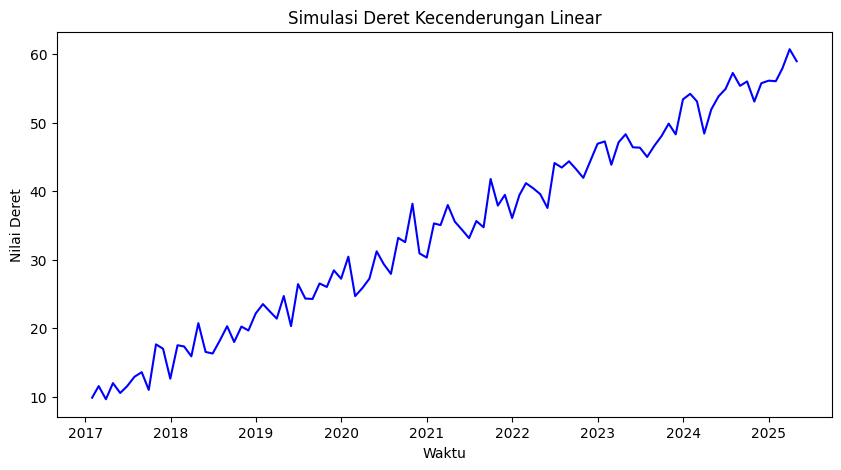

In [40]:
# Plot deret waktu dengan tren linear
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Value"], color="b")
plt.xlabel("Waktu")
plt.ylabel("Nilai Deret")
plt.title("Simulasi Deret Kecenderungan Linear")
plt.show()

**Cek apakah ada korelasi antar pengamatan?**


*   Berdasarkan gambar grafik, terlihat data memiliki tren naik, pengamatan yang bedekatan cenderung memiliki korelasi positif.





In [41]:
# Konversi kolom Time menjadi angka (misalnya jumlah bulan sejak periode pertama)
df["Time_Numeric"] = (df["Time"].dt.to_period("M") - df["Time"].dt.to_period("M").min()).apply(lambda x: x.n)

# Hitung korelasi antara Time_Numeric dan Value
correlation = df["Time_Numeric"].corr(df["Value"])

print(f"Nilai korelasi antara Time dan Value: {correlation:.4f}")

Nilai korelasi antara Time dan Value: 0.9908


*   Nilai korelasi antara time dan value adalah 0.9908, karena nilai korelasi ini sangat dekat dengan 1, hal ini menunjukkan hubungan linear positif yang sangat kuat. Artinya, seiring bertambahnya waktu, nilai deret cenderung meningkat secara konsisten konsisten dengan tren linear yang dibangun pada data.



In [42]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X = df["Time_Numeric"]
Y = df["Value"]

#memanggil package statsmodels
import statsmodels.api as sm

# Tambahkan konstanta (intercept) ke model regresi
X = sm.add_constant(X)

# Buat dan jalankan model regresi
model = sm.OLS(Y, X).fit()

# menampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5258.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           5.85e-87
Time:                        14:25:14   Log-Likelihood:                -208.21
No. Observations:                 100   AIC:                             420.4
Df Residuals:                      98   BIC:                             425.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.9308      0.389     25.517   

*   **Bagaimana hasil pengepasan model regresi dibandingkan dengan nilai parameter asli?**
Parameter asli : intersep = 10, dan slope = 0.5
Hasil regresi: intersep = 9.9308, dan slope = 0.4925

Intersep : Hasil regresi menunjukkan nilai 9.9308, sangat dekat dengan nilai asli 10. Ini menunjukkan bahwa model berhasil memperkirakan intercept dengan sangat akurat, meskipun ada sedikit perbedaan yang wajar karena adanya noise acak dalam data.

Slope : Nilai slope dari model adalah 0.4925, mendekati nilai asli 0.5. Perbedaan kecil ini menunjukkan bahwa model mampu menangkap tren linier secara tepat, meskipun sedikit terpengaruh oleh variasi acak (noise)

*   **Apakah model regresi yang dipaskan sudah bagus?**

ya sudah bagus karena:
R-Squared Tinggi (0.982) ini menunjukkan bahwa model sangat efektif dalam menangkap pola hubungan antara waktu dan nilai deret waktu, dan koefisien yang dekat dengan parameter asli.
Model regresi ini sudah sangat baik dalam hal akurasi, kestabilan, dan kesesuaian dengan data asli. Hasil ini menunjukkan bahwa model mampu merepresentasikan hubungan linier secara tepat meskipun terdapat noise. Anda hanya perlu memantau outlier atau variansi residual jika ingin lebih detail, tetapi secara keseluruhan model ini sudah optimal.

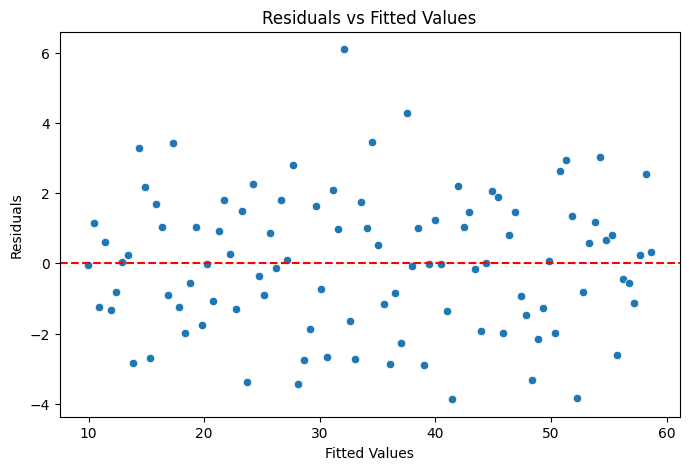

In [43]:
# Analisis Sisaan Model
import seaborn as sns

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8,5))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


**Apa interpretasi dari plot tersebut?**

Plot yang membandingkan residual dengan fitted values digunakan untuk memeriksa asumsi heteroskedastisitas. Pola sebaran titik yang acak pada scatter plot menunjukkan bahwa variansi residual bersifat homogen, sehingga asumsi kesamaan ragam terpenuhi tanpa ada pelanggaran.



In [44]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Uji Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")


P-value Breusch-Pagan Test: 0.8042


**Apa kesimpulan dari nilai uji Breusch Pagan tersebut?**

Hasil uji menunjukkan p-value di atas tingkat signifikansi 0,05 sehingga mengindikasikan bahwa variansi residual bersifat homogen. Temuan ini sejalan dengan hasil scatter plot sebelumnya, sehingga dapat disimpulkan bahwa asumsi heteroskedastisitas terpenuhi.

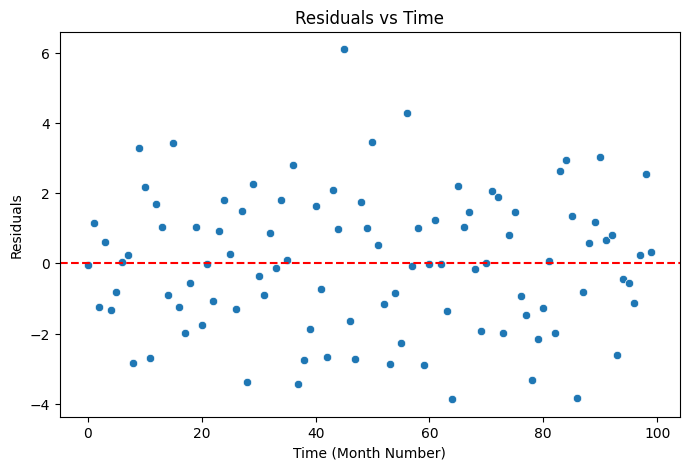

In [45]:
# Plot residual vs time
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Time_Numeric"], y=model.resid)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time")
plt.show()


<Figure size 800x500 with 0 Axes>

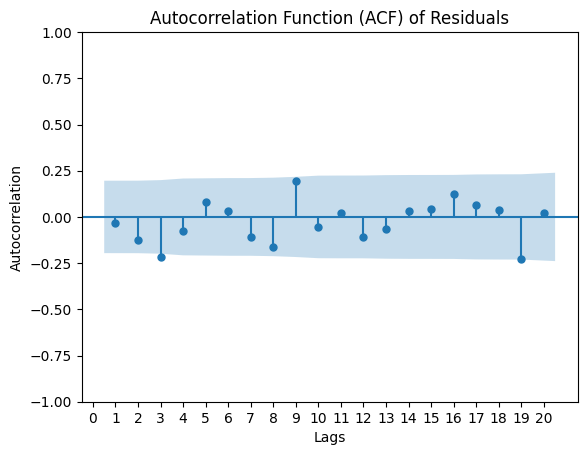

In [46]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(8, 5))
plot_acf(model.resid, lags=20, zero=False)
plt.xticks(ticks=range(0, 21, 1))
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


**Apa yang dapat Anda simpulkan dari plot di atas?**

Hasil scatter plot menunjukkan sebaran residual yang acak, sementara plot ACF memperlihatkan beberapa titik yang mendekati batas signifikan. Berdasarkan pola ini, dapat disimpulkan bahwa residual tidak menunjukkan adanya autokorelasi antar pengamatan. Namun, terdapat sedikit keraguan pada titik lag 3, 9, dan 19 yang berada di dekat batas kepercayaan. Untuk memastikan lebih lanjut, uji Ljung-Box dapat dilakukan guna mengkonfirmasi keberadaan autokorelasi secara statistik.

In [47]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(model.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)


Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.120161   0.728860
2    1.690963   0.429351
3    6.544594   0.087920
4    7.201980   0.125592
5    7.864393   0.163869
6    7.969352   0.240357
7    9.201405   0.238518
8   12.091148   0.147183
9   16.211228   0.062599
10  16.560187   0.084680
11  16.601719   0.120221
12  18.022774   0.115001
13  18.564142   0.137250
14  18.668851   0.177992
15  18.898345   0.218377
16  20.713840   0.189774
17  21.187471   0.218017
18  21.361996   0.261545
19  27.761677   0.088124


**Apa kesimpulan dari hasil uji Ljung-Box tersebut?**

semua p-value lebih besar dari 0,05 (berkisar darii 0.062 hingga 0,73) tidak ada satu pun lag yang menunjukkan autokorelasi signifikan, tidak ada pola acak yang mencurigakan bahkan di lag tinggi.



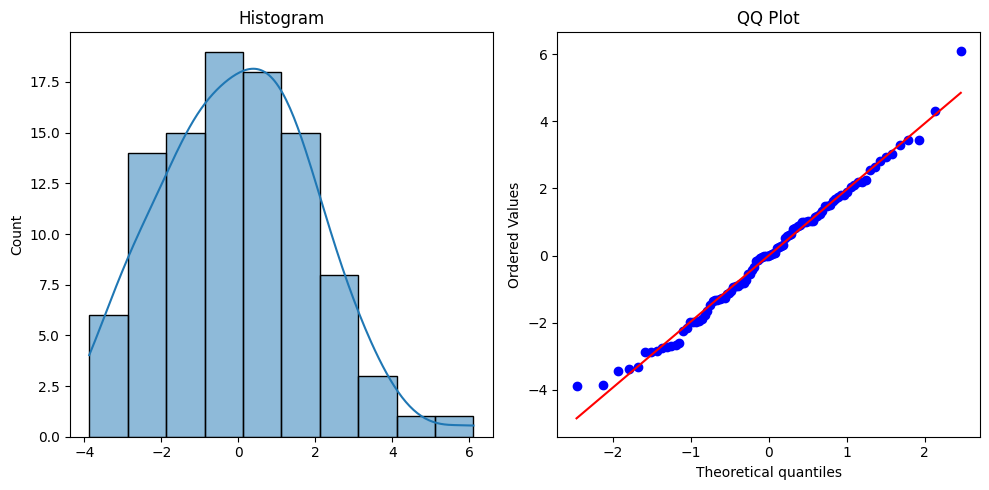

In [48]:
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(model.resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(model.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

**Apa kesimpulan Anda berdasarkan plot di atas?**

Histogram menunjukkan distribusi residual yang cenderung simetris dengan puncak di sekitar nol, mengindikasikan pola distribusi yang mendekati normal. QQ Plot memperlihatkan sebagian besar titik berada di sepanjang garis diagonal merah, menunjukkan kecocokan yang baik dengan distribusi normal. Meskipun terdapat beberapa penyimpangan kecil di ujung ekor, hal ini masih dalam batas wajar. Secara keseluruhan, kedua plot ini mendukung asumsi normalitas residual dalam model regresi.

In [49]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.988668110657226, p-value = 0.5586924903887203


**Apakah kesimpulan Anda dari nilai uji Shapiro Wilk sama dengan kesimpulan Anda berdasarkan plot?**

Dengan p-value = 0.5587 dari uji Shapiro-Wilk, yang jauh lebih besar dari 0.05, kita gagal menolak hipotesis nol yang menyatakan bahwa residual berdistribusi normal. Nilai statistik 0.9887 juga mendukung kesimpulan ini, menunjukkan distribusi residual sangat mendekati distribusi normal. Oleh karena itu, dapat disimpulkan bahwa asumsi normalitas residual terpenuhi dalam model regresi ini. Ya, sesuai dengan plot

## Kecenderungan Kuadratik

Deret dikatakan memiliki kecenderungan kuadratik dalam waktu jika $\mu_t$ dapat dinyatakan sebagai:

$\mu_t=\beta_0+\beta_1t+\beta_2t^2$


In [72]:
# Menentukan parameter simulasi
np.random.seed(2025)
n_periods = 120
beta_0, beta_1, beta_2= 50, 0.5, 0.02
noise = np.random.normal(0, 10, n_periods)
time = np.arange(n_periods)

# Membuat komponen kuadratik
quadratic_component = beta_0 + beta_1 * time + beta_2 * time**2
quadratic_componen1 = beta_0 + beta_1 * time
quadratic_compenen2 = beta_0 + beta_2 * time**2

# Menambahkan noise untuk membuat data lebih realistis
data = quadratic_component + noise
data1 = quadratic_componen1 + noise
data2 = quadratic_compenen2 + noise

# Membuat DataFrame
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')
df_quad = pd.DataFrame({'Date': dates, 'Value': data})

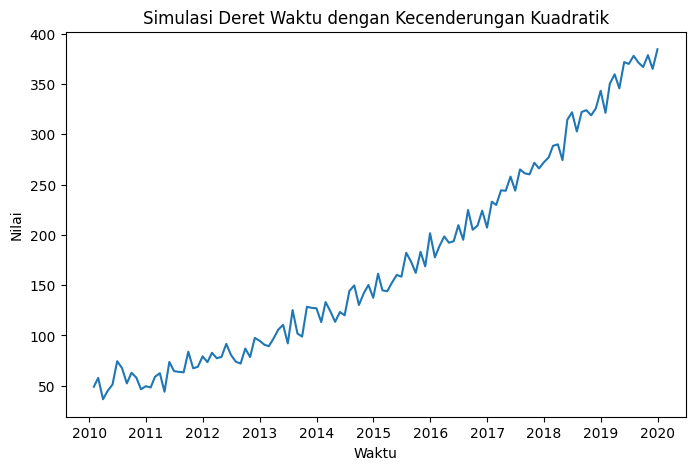

In [51]:
# Plot hasil simulasi deret waktu dengan kecenderungan kuadratik
plt.figure(figsize=(8, 5))
plt.plot(df_quad.Date, df_quad['Value'])
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.show()

In [52]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X = np.column_stack((time, time**2))
X = sm.add_constant(X)
Y = data

# Buat dan jalankan model regresi
model_quad = sm.OLS(Y, X).fit()

# menampilkan ringkasan hasil regresi
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6603.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          5.02e-121
Time:                        14:27:04   Log-Likelihood:                -441.14
No. Observations:                 120   AIC:                             888.3
Df Residuals:                     117   BIC:                             896.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7612      2.607     19.855      0.0

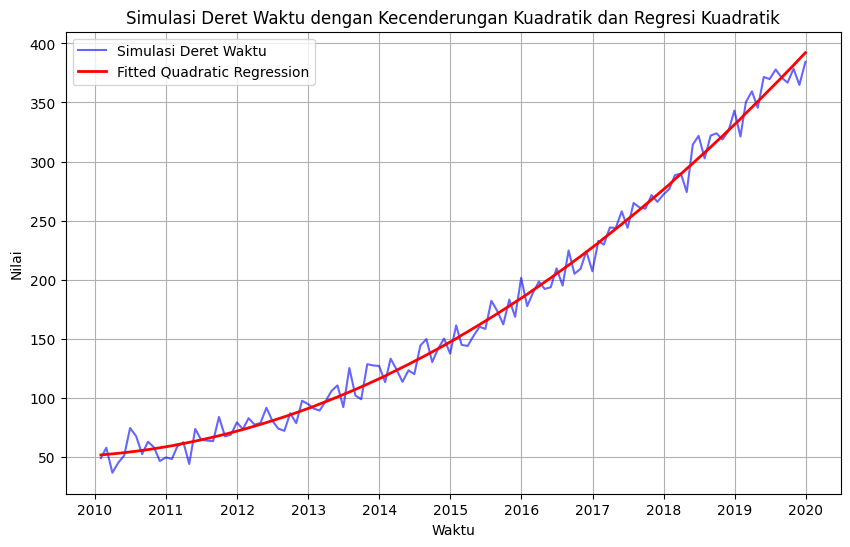

In [53]:
# Prediksi menggunakan model yang sudah dilatih
data_pred = model_quad.predict(X)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(df_quad.Date, df_quad['Value'], label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(df_quad.Date, data_pred, label='Fitted Quadratic Regression', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik dan Regresi Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

Cek apakah model regresi kuadratik yang dipaskan terhadap sudah memenuhi asumsi!

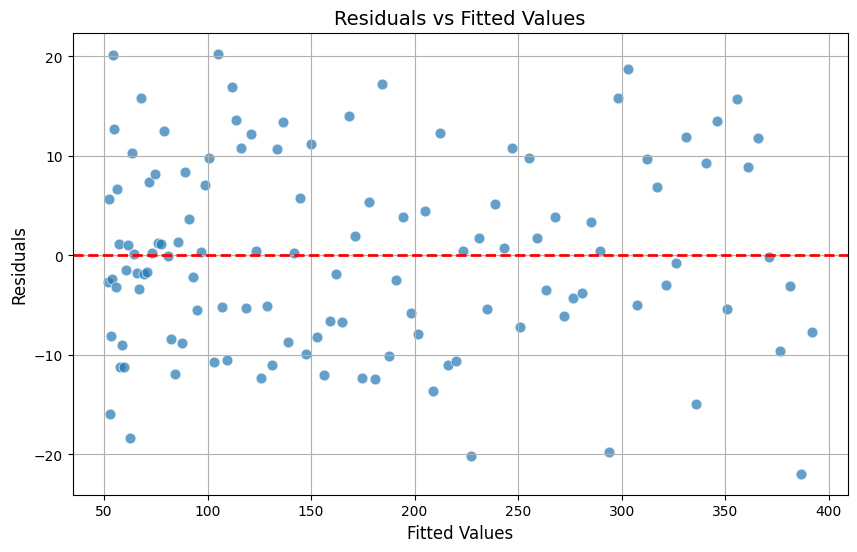

In [54]:
#Analisis Sisaan Model
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Residuals vs. Fitted Values dengan Modifikasi
plt.figure(figsize=(10, 6))

# Scatterplot Residuals vs Fitted Values
sns.scatterplot(x=model_quad.fittedvalues, y=model_quad.resid, alpha=0.7, s=60)

# Menambahkan garis horizontal di y=0
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)

# Label dan Judul
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residuals vs Fitted Values", fontsize=14)

# Grid untuk memperjelas plot
plt.grid(True)
plt.show()

Titik-titik tersebar secara acak di sekitar garis horizontal merah, tidak ada pola sistematis. Titik-titik terlihat merata di seluruh rentang nilai fitted menunjukkan tidak da clustering dan tidak terlihat ada outlier ekstrem. Sehingga asumsi linearitas terpenuhi, model regresi kuadratik ini stabil dalam menangkap hubungan antara variabel independen dan dependen.

In [55]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Uji Breusch-Pagan untuk Model Kuadratik
bp_test = het_breuschpagan(model_quad.resid, model_quad.model.exog)

# Menampilkan hasil p-value
print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")

P-value Breusch-Pagan Test: 0.4354


karena nilai p-value = 0.4354, yang lebih besar dari 0,05 sehingga gagal menolak H0, artinya tidak ada bukti signifikan untuk menunjukkana danya heteroskedastisitas dalam model regresi kuadratik ini. Model regresi kuadratik memenuhi asumsi homoskedastisitas.

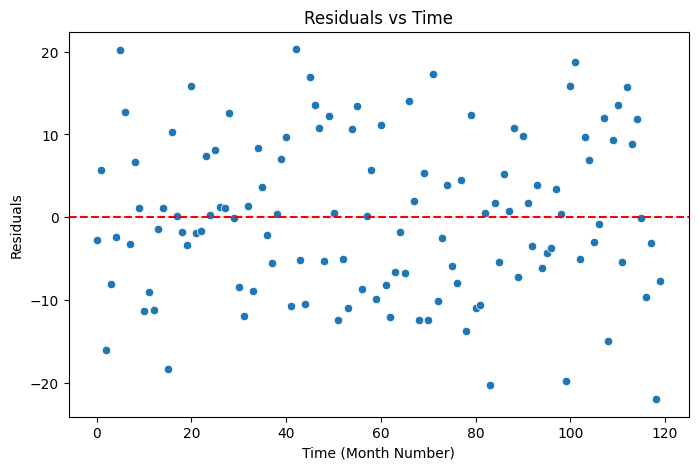

In [56]:
plt.figure(figsize=(8, 5))

# Scatterplot Residuals vs Time
sns.scatterplot(x=df_quad.index, y=model_quad.resid)

# Garis horizontal di y=0
plt.axhline(y=0, color="red", linestyle="--")

# Label dan Judul
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time")

# Menampilkan plot
plt.show()

model kuadratik ini memenuhi asumsi independensi residual artinya tidak ada pola sistematis yang menunjukkan bahwa residual pada satu periode dipengaruhi oleh periode lainnya, dan residual tersebar acak tanpa pola signifikan.

<Figure size 800x500 with 0 Axes>

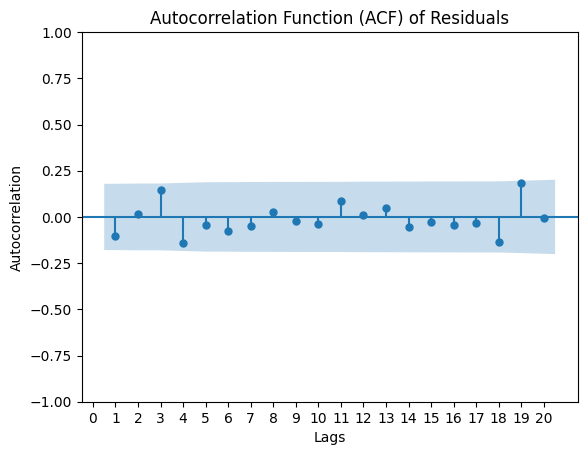

In [57]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot Autocorrelation Function (ACF) untuk Residual Model Kuadratik
plt.figure(figsize=(8, 5))
plot_acf(model_quad.resid, lags=20, zero=False)
plt.xticks(ticks=range(0, 21, 1))
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

Asumsi tidak ada autokorelasi terpenuhi, tidak residual bersifat acak dan residual bersifat acak dan tidak menunjukkan ketergantungan temporal. Model regresi kuadratik stabil dan valid untuk analisis prediksi.

In [58]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(model_quad.resid, lags=range(1, 20), return_df=True)

# Menampilkan hasil p-value
print("Ljung-Box Test p-value:")
print(ljung_box_test)


Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    1.283393   0.257269
2    1.312712   0.518738
3    3.952152   0.266677
4    6.372570   0.172999
5    6.594370   0.252597
6    7.294764   0.294446
7    7.604234   0.368781
8    7.699596   0.463351
9    7.772514   0.557224
10   7.964266   0.632328
11   8.922550   0.629041
12   8.942863   0.707803
13   9.274047   0.751945
14   9.672043   0.785746
15   9.772476   0.833802
16  10.066898   0.863111
17  10.234731   0.893479
18  12.955595   0.794204
19  17.824158   0.534211


semua p-value lebih besar dari 0,05 (berkisar darii 0.17 hingga 0,89) tidak ada satu pun lag yang menunjukkan autokorelasi signifikan, tidak ada pola acak yang mencurigakan bahkan di lag tinggi.

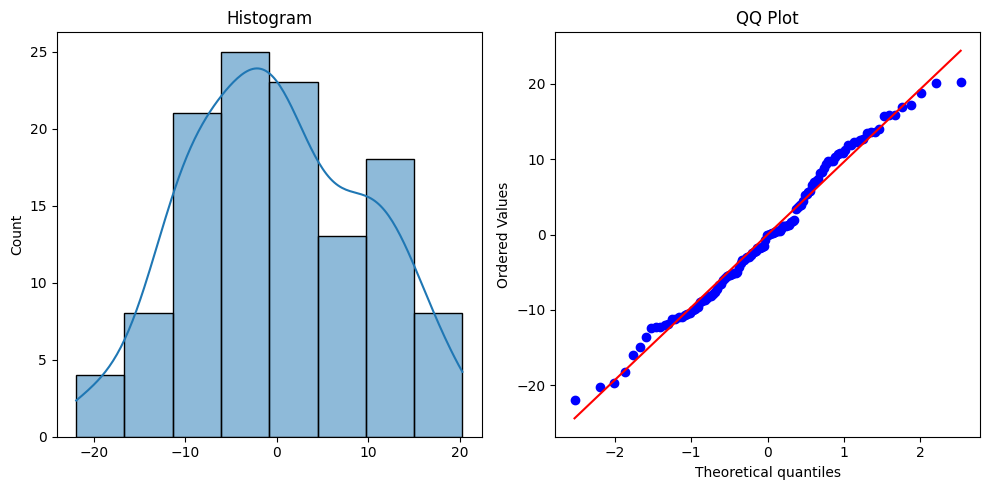

In [59]:
import scipy.stats as stats

# Histogram dan QQ Plot untuk Residual Model Kuadratik
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram
sns.histplot(model_quad.resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(model_quad.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

Distribusi tidak terlalu berdistribusi normal namun mendekati distribusi normal,terlihat dari puncak di tengah dan distribusi yang simetris di sekitar nol.

pada QQ Plot sebagaian besar titik residual berada di sepanjang garis merah diagonal, yang menunjukkan bahwa distribusi residual cukup mengikuti distribusi normal. Ada sedikit penyimpangan di ekor atas dan bawah.

Disimpulkan bahwa asumsi normalitas residual terpenuhi secara umum.

In [60]:
# Uji Shapiro-Wilk untuk Normalitas Residual
shapiro_stat, shapiro_p_value = stats.shapiro(model_quad.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")


Shapiro-Wilk Test: Statistics = 0.9838650151541809, p-value = 0.1621485706370721


dengan hasil p-value = 0.1621 yang mana ini lebih besar dari 0,05 sehingga kita gagal menolak H0, yang berarti tidak ada bukti signifikan bahwa residual model kudratik menyimpang dari distribusi normal. sehingga asumsi normalitas residual terpenuhi.

In [61]:
# Metode kuadratik dengan mencoba jika dengan t saja
X_time = sm.add_constant(time)
Y = data1
model_time = sm.OLS(Y, X_time).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     355.3
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           2.15e-37
Time:                        14:27:36   Log-Likelihood:                -441.49
No. Observations:                 120   AIC:                             887.0
Df Residuals:                     118   BIC:                             892.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1777      1.754     28.614      0.0

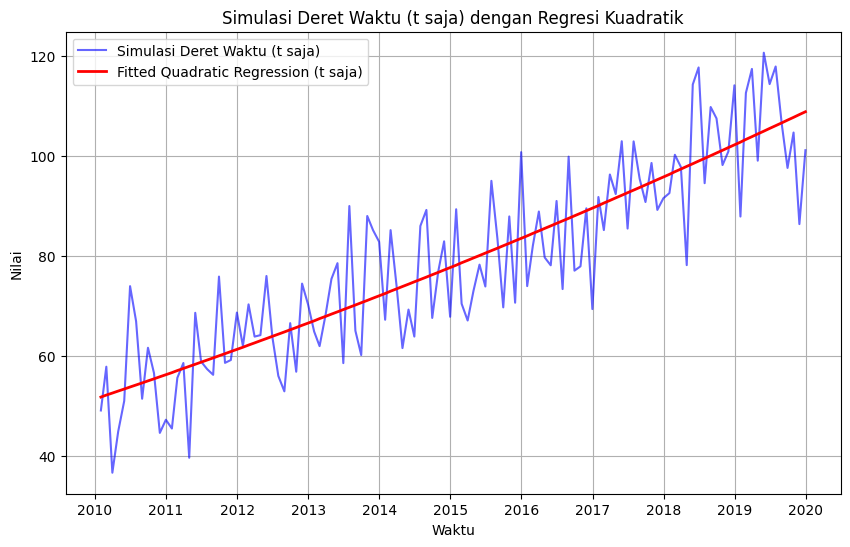

Koefisien Regresi Kuadratik: [6.76636427e-04 3.99600333e-01 5.17612253e+01]


In [62]:
# Model regresi kuadratik menggunakan polynomial fitting degree 2
model_time_quad = np.polyfit(time, Y, 2)  # Fitting polynomial derajat 2

# Prediksi menggunakan model regresi kuadratik
data_pred = np.polyval(model_time_quad, time)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(df_quad.Date, data1, label='Simulasi Deret Waktu (t saja)', color='blue', alpha=0.6)
plt.plot(df_quad.Date, data_pred, label='Fitted Quadratic Regression (t saja)', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu (t saja) dengan Regresi Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan koefisien model regresi kuadratik
print(f"Koefisien Regresi Kuadratik: {model_time_quad}")

Cek apakah model regresi kuadratik yang dipaskan terhadap sudah memenuhi asumsi!

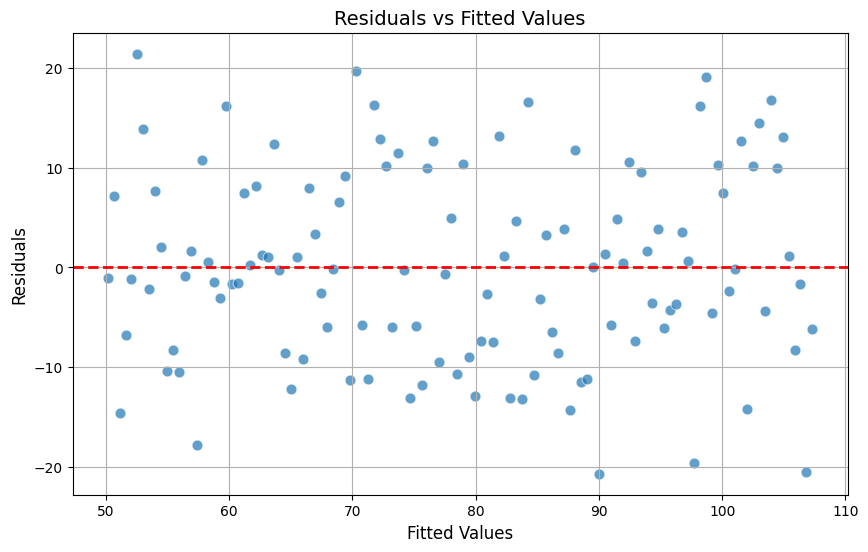

In [63]:
# Analisis Sisaan Model
plt.figure(figsize=(10, 6))

# Scatterplot Residuals vs Fitted Values
sns.scatterplot(x=model_time.fittedvalues, y=model_time.resid, alpha=0.7, s=60)

# Menambahkan garis horizontal di y=0
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)

# Label dan Judul
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residuals vs Fitted Values", fontsize=14)

# Grid untuk memperjelas plot
plt.grid(True)
plt.show()

Residual terlihat tersebar acak di sekitar nol tanpa pola khusus, menunjukkan asumsi linearitas dan homoskedastisitas terpenuhi. Namun, terdapat beberapa outlier yang mungkin memengaruhi kestabilan model. Secara keseluruhan, model cukup baik, tetapi perlu analisis lanjut untuk outlier.

In [64]:
# Uji Breusch-Pagan untuk Model dengan t saja
bp_test = het_breuschpagan(model_time.resid, model_time.model.exog)

# Menampilkan hasil p-value
print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")

P-value Breusch-Pagan Test: 0.2942


P-value Breusch-Pagan Test sebesar 0,2942 ini lebih besar dari 0,05, menunjukkan bahwa tidak ada bukti signifikan untuk menolak hipotesis nol, sehingga dapat disimpulkan bahwa model tidak mengalami masalah heteroskedastisitas dan variansi residual cenderung homogen.

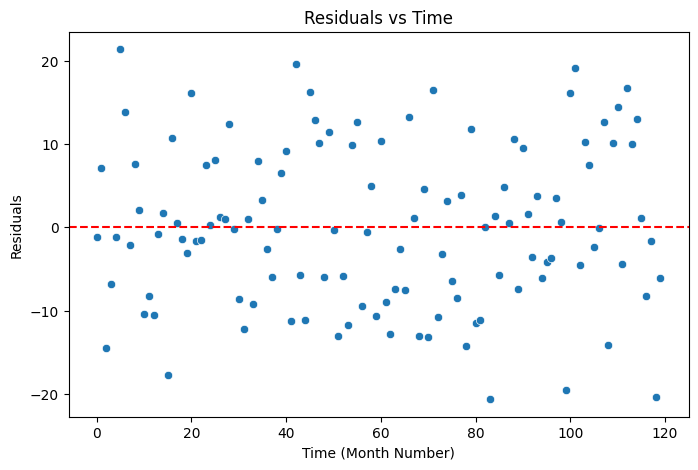

In [65]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=df_quad.index, y=model_time.resid)

# Garis horizontal di y=0
plt.axhline(y=0, color="red", linestyle="--")

# Label dan Judul
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time")

# Menampilkan plot
plt.show()

Plot menunjukkan pola penyebaran residual yang acak di sekitar garis nol tanpa pola tren atau siklus yang jelas. Hal ini mengindikasikan bahwa tidak ada autokorelasi residual yang signifikan, sehingga asumsi independensi residual dalam model regresi cenderung terpenuhi.

<Figure size 800x500 with 0 Axes>

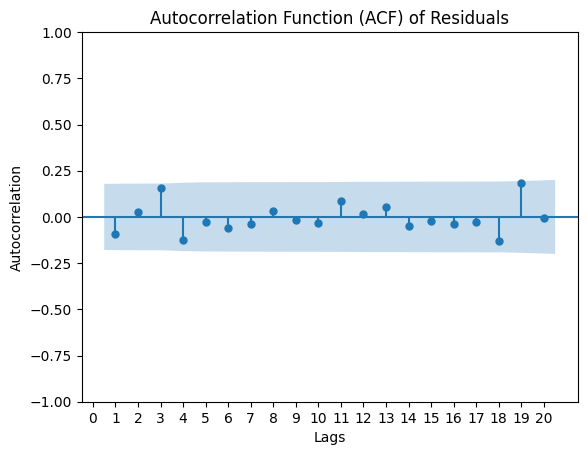

In [66]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot Autocorrelation Function (ACF) untuk Residual Model Kuadratik
plt.figure(figsize=(8, 5))
plot_acf(model_time.resid, lags=20, zero=False)
plt.xticks(ticks=range(0, 21, 1))
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

Plot ACF of Residuals menunjukkan bahwa semua nilai autokorelasi untuk berbagai lag berada dalam batas kepercayaan, mengindikasikan tidak adanya autokorelasi signifikan pada residual. Hal ini menunjukkan bahwa asumsi independensi residual dalam model regresi terpenuhi.

In [67]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(model_time.resid, lags=range(1, 20), return_df=True)

# Menampilkan hasil p-value
print("Ljung-Box Test p-value:")
print(ljung_box_test)

Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    1.098218   0.294657
2    1.173590   0.556107
3    4.242087   0.236482
4    6.142758   0.188738
5    6.228203   0.284643
6    6.728207   0.346715
7    6.943745   0.434761
8    7.083116   0.527692
9    7.125739   0.624030
10   7.286642   0.698135
11   8.301487   0.686070
12   8.347483   0.757420
13   8.760310   0.790796
14   9.067343   0.826713
15   9.124722   0.870906
16   9.322066   0.899560
17   9.442953   0.925333
18  11.917418   0.851472
19  16.886378   0.597565


semua p-value lebih besar dari 0,05 (berkisar darii 0.189 hingga 0,925) tidak ada satu pun lag yang menunjukkan autokorelasi signifikan, tidak ada pola acak yang mencurigakan bahkan di lag tinggi.

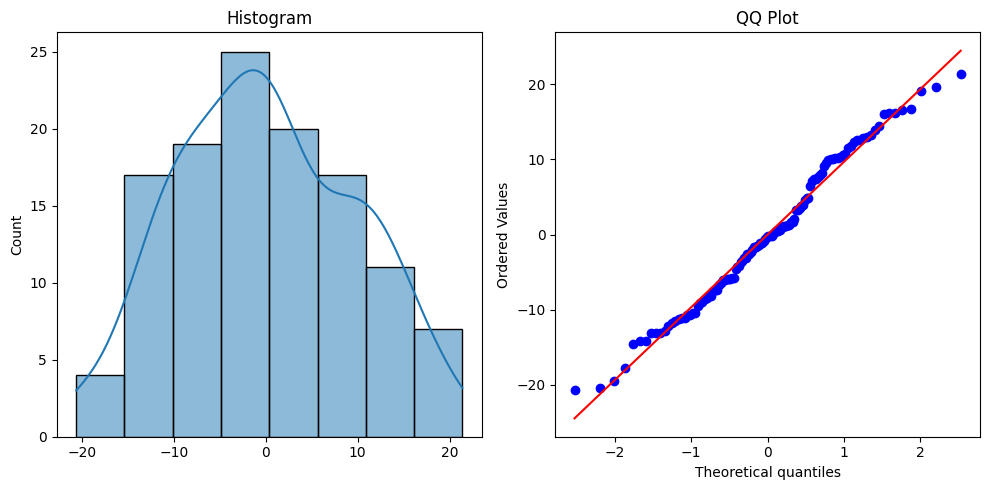

In [68]:
import scipy.stats as stats

# Histogram dan QQ Plot untuk Residual Model Kuadratik
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram
sns.histplot(model_time.resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(model_time.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

Berdasarkan histogram dan QQ plot residual, distribusi residual menunjukkan pola yang mendekati distribusi normal. Histogram memperlihatkan bentuk yang simetris dengan puncak di sekitar nol, meskipun ada sedikit ketidaksempurnaan di ekor distribusi. Sementara itu, QQ plot menunjukkan bahwa sebagian besar titik residual berada di sepanjang garis diagonal merah, mengindikasikan kesesuaian yang baik dengan distribusi normal. Beberapa deviasi kecil di ekor menunjukkan adanya sedikit penyimpangan dari normalitas, tetapi tidak cukup signifikan untuk menimbulkan kekhawatiran serius. Secara keseluruhan, residual cenderung mengikuti distribusi normal, mendukung asumsi normalitas dalam model regresi.

In [69]:
# Uji Shapiro-Wilk untuk Normalitas ResidualBerdasarkan histogram dan QQ plot residual, distribusi residual menunjukkan pola yang mendekati distribusi normal. Histogram memperlihatkan bentuk yang simetris dengan puncak di sekitar nol, meskipun ada sedikit ketidaksempurnaan di ekor distribusi. Sementara itu, QQ plot menunjukkan bahwa sebagian besar titik residual berada di sepanjang garis diagonal merah, mengindikasikan kesesuaian yang baik dengan distribusi normal. Beberapa deviasi kecil di ekor menunjukkan adanya sedikit penyimpangan dari normalitas, tetapi tidak cukup signifikan untuk menimbulkan kekhawatiran serius. Secara keseluruhan, residual cenderung mengikuti distribusi normal, mendukung asumsi normalitas dalam model regresi.
shapiro_stat, shapiro_p_value = stats.shapiro(model_time.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")


Shapiro-Wilk Test: Statistics = 0.9832343484675542, p-value = 0.1419569813643654


Hasil Shapiro-Wilk Test menunjukkan statistik sebesar 0.9832 dengan p-value 0.142. Karena p-value lebih besar dari 0.05, tidak ada bukti yang cukup untuk menolak hipotesis nol, yang menyatakan bahwa residual terdistribusi normal. Dengan demikian, dapat disimpulkan bahwa residual model ini memenuhi asumsi normalitas. ya sama dengan dugaan saat melihat plot.

In [70]:
# Metode kuadratik dengan mencoba jika dengan t**2 saja
X_time2 = sm.add_constant(time**2)
Y = data2
model_time2 = sm.OLS(Y, X_time2).fit()
print(model_time2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     9193.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          8.65e-114
Time:                        14:28:17   Log-Likelihood:                -441.64
No. Observations:                 120   AIC:                             887.3
Df Residuals:                     118   BIC:                             892.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5329      1.322     37.475      0.0

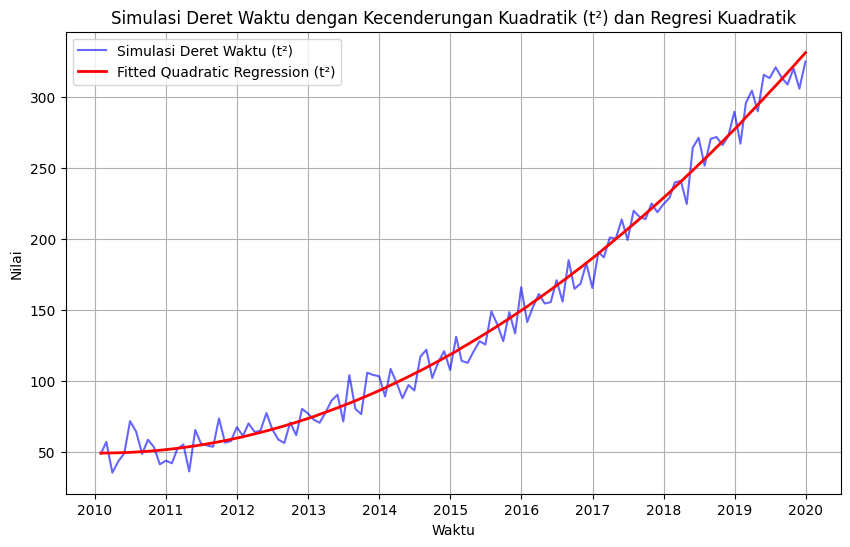

In [76]:
# Prediksi menggunakan model yang sudah dilatih
data_pred_time2 = model_time2.predict(X_time2)

# Plot hasil simulasi deret waktu dan regresi kuadratik dengan t**2 saja
plt.figure(figsize=(10, 6))
plt.plot(df_quad.Date, data2, label='Simulasi Deret Waktu (t²)', color='blue', alpha=0.6)
plt.plot(df_quad.Date, data_pred_time2, label='Fitted Quadratic Regression (t²)', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik (t²) dan Regresi Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

Cek apakah model regresi kuadratik yang dipaskan terhadap sudah memenuhi asumsi!

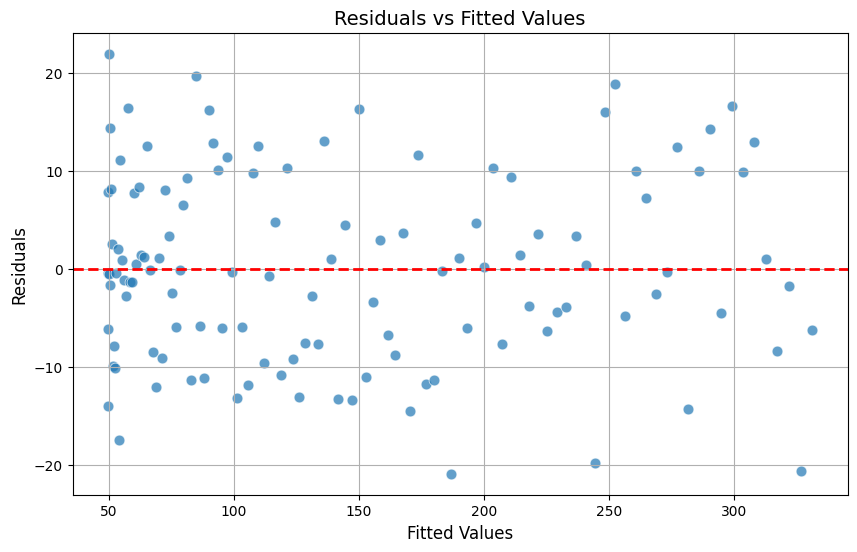

In [77]:
# Analisis Sisaan Model
plt.figure(figsize=(10, 6))

# Scatterplot Residuals vs Fitted Values
sns.scatterplot(x=model_time2.fittedvalues, y=model_time2.resid, alpha=0.7, s=60)

# Menambahkan garis horizontal di y=0
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)

# Label dan Judul
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residuals vs Fitted Values", fontsize=14)

# Grid untuk memperjelas plot
plt.grid(True)
plt.show()

Plot menunjukkan pola penyebaran residual yang acak di sekitar garis nol, tanpa pola melengkung atau tren yang jelas, mengindikasikan bahwa asumsi linearitas dalam model terpenuhi. Meskipun terdapat variasi residual yang lebih besar pada nilai fitted tertentu, tidak terlihat adanya pola khusus yang menunjukkan masalah heteroskedastisitas yang signifikan.

In [78]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Uji Breusch-Pagan untuk Model dengan t**2
bp_test_time2 = het_breuschpagan(model_time2.resid, model_time2.model.exog)

# Menampilkan hasil p-value
print(f"P-value Breusch-Pagan Test (t²): {bp_test_time2[1]:.4f}")

P-value Breusch-Pagan Test (t²): 0.2453


P-value sebesar 0.2453 lebih besar dari 0.05, menunjukkan bahwa tidak ada bukti signifikan untuk menolak hipotesis nol. Artinya, model tidak menunjukkan adanya masalah heteroskedastisitas, sehingga variansi residual cenderung stabil atau homogen di seluruh rentang data. Dengan kata lain, asumsi kesamaan variansi dalam model regresi terpenuhi.

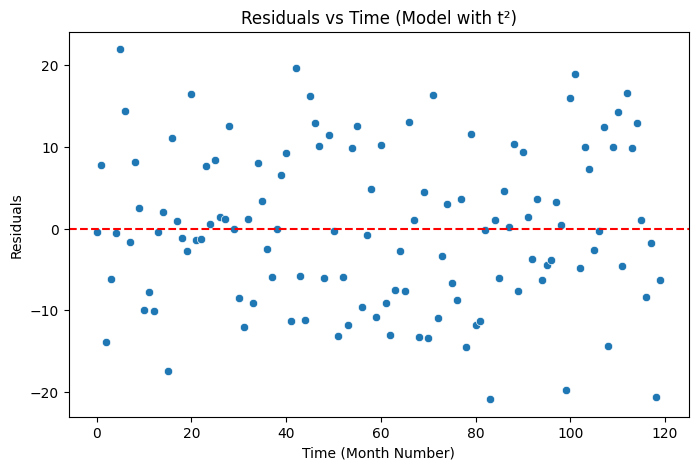

In [79]:
plt.figure(figsize=(8, 5))

# Scatterplot Residuals vs Time untuk model dengan t**2
sns.scatterplot(x=df_quad.index, y=model_time2.resid)

# Garis horizontal di y=0
plt.axhline(y=0, color="red", linestyle="--")

# Label dan Judul
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time (Model with t²)")

# Menampilkan plot
plt.show()

Plot menunjukkan bahwa residual tersebar secara acak di sekitar garis nol tanpa membentuk pola tertentu. Sebaran acak ini mengindikasikan bahwa model tidak mengalami masalah autokorelasi residual, sehingga asumsi independensi residual terpenuhi. Selain itu, variansi residual terlihat cukup stabil dari waktu ke waktu, meskipun terdapat beberapa outlier dengan nilai ekstrem. Secara keseluruhan, model menunjukkan performa yang baik dalam hal kestabilan residual.

<Figure size 800x500 with 0 Axes>

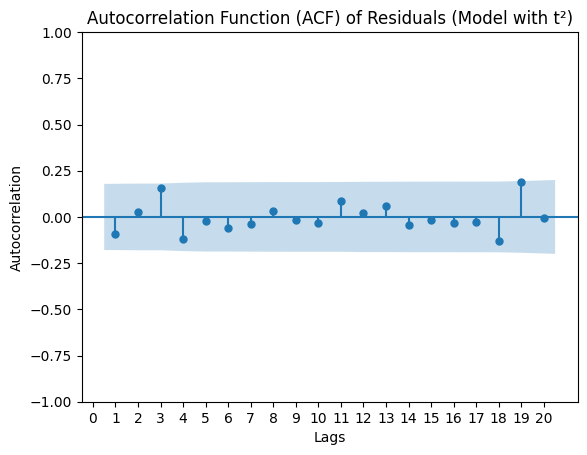

In [80]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot Autocorrelation Function (ACF) untuk Residual Model dengan t**2
plt.figure(figsize=(8, 5))
plot_acf(model_time2.resid, lags=20, zero=False)
plt.xticks(ticks=range(0, 21, 1))
plt.title("Autocorrelation Function (ACF) of Residuals (Model with t²)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

Plot ACF of Residuals menunjukkan bahwa semua nilai autokorelasi untuk berbagai lag berada dalam batas kepercayaan, mengindikasikan tidak adanya autokorelasi signifikan pada residual. Hal ini menunjukkan bahwa residual model bersifat independen satu sama lain, sehingga asumsi independensi residual dalam model regresi terpenuhi. Dengan demikian, model tidak mengalami masalah autokorelasi.

In [81]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test_time2 = acorr_ljungbox(model_time2.resid, lags=range(1, 20), return_df=True)

# Menampilkan hasil p-value
print("Ljung-Box Test p-value (Model with t²):")
print(ljung_box_test_time2)

Ljung-Box Test p-value (Model with t²):
      lb_stat  lb_pvalue
1    1.033073   0.309438
2    1.120458   0.571078
3    4.283429   0.232441
4    6.078315   0.193376
5    6.143247   0.292529
6    6.607179   0.358706
7    6.807285   0.449217
8    6.960125   0.540941
9    6.997587   0.637371
10   7.148274   0.711377
11   8.197301   0.695528
12   8.253422   0.765026
13   8.705361   0.794814
14   8.976674   0.832542
15   9.020261   0.876456
16   9.179955   0.905818
17   9.275871   0.931207
18  11.625769   0.865944
19  16.744243   0.607190


semua p-value lebih besar dari 0,05 (berkisar darii 0.19 hingga 0,931) tidak ada satu pun lag yang menunjukkan autokorelasi signifikan, tidak ada pola acak yang mencurigakan bahkan di lag tinggi.

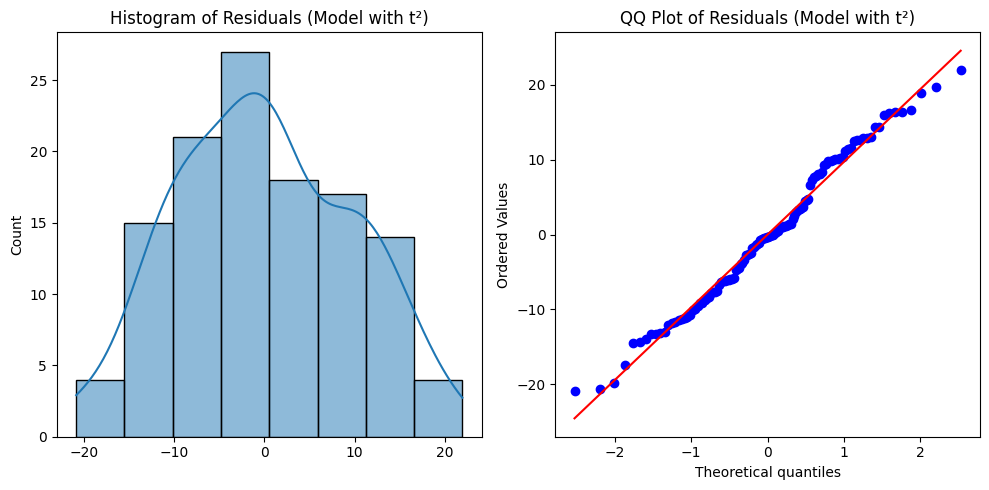

In [82]:
import scipy.stats as stats

# Histogram dan QQ Plot untuk Residual Model dengan t**2
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram
sns.histplot(model_time2.resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals (Model with t²)')

# QQ Plot
stats.probplot(model_time2.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot of Residuals (Model with t²)')

plt.tight_layout()
plt.show()

Histogram dan QQ Plot residual untuk Model dengan t² menunjukkan bahwa distribusi residual mendekati distribusi normal. Histogram memperlihatkan bentuk simetris dengan puncak di sekitar nol, yang konsisten dengan karakteristik distribusi normal, meskipun terdapat sedikit variasi di ekor distribusi. QQ Plot menunjukkan sebagian besar titik residual berada di sepanjang garis diagonal merah, menandakan kecocokan yang baik dengan distribusi normal, meskipun terdapat sedikit deviasi di ujung ekor atas dan bawah. Secara keseluruhan, hasil ini mengindikasikan bahwa asumsi normalitas residual dalam model terpenuhi dengan baik.

In [84]:
# Uji Shapiro-Wilk untuk Normalitas Residual Model dengan t**2
shapiro_stat_time2, shapiro_p_value_time2 = stats.shapiro(model_time2.resid)
print(f"Shapiro-Wilk Test (Model with t²): Statistics = {shapiro_stat_time2:.4f}, p-value = {shapiro_p_value_time2:.4f}")


Shapiro-Wilk Test (Model with t²): Statistics = 0.9838, p-value = 0.1598


Dengan p-value = 0,1598 lebih besar dari 0,05, kita gagal menolak hipotesis nol yang menyatakan bahwa residual berdistribusi normal. Nilai statistik 0.9838 juga menunjukkan bahwa distribusi residual cukup mendekati distribusi normal. Oleh karena itu, dapat disimpulkan bahwa asumsi normalitas residual. hal ini sesuai dgn plot yang dihasilkan

## Kecenderungan Musiman/Siklik

Misalkan suatu deret waktu memiliki nilaitengah $\mu_t$ yang didefinisikan sebagai berikut:

$\mu_t=\beta_0+\beta_1 cos(2\pi f t)+\beta_2 sin(2\pi ft)$

Deret tersebut memiliki kecenderungan kosinus yang berpola musiman.

Bentuk lain fungsi nilaitengah dari kecenderungan musiman (misalnya untuk data bulanan) adalah $\mu_t$ berupa suatu konstanta sejumlah 12 yang nilai berbeda-beda. Nilai ini diinterpretasikan sebagai nilai harapan rata-rata data untuk masing-masing bulan, atau dapat dituliskan sebagai berikut:

$\mu_t=\beta_1$ , untuk $t=1,13,25,...$
       
$\mu_t=\beta_2$ , untuk $t=2,14,26,...$

$.$

$.$

$.$

$\mu_t=\beta_{12}$ , $untuk t=12,24,36,...$


In [104]:
# Menentukan parameter simulasi
np.random.seed(100)
n_periods = 120
beta0, beta1, beta2=50,-25, -2
freq=1/12

# Membuat komponen musiman
time = np.arange(n_periods)
seasonal_component = beta0+ beta1*np.cos(2*np.pi*time*freq)+beta2*np.sin(2*np.pi*time*freq)

# Menambahkan noise acak
noise = np.random.normal(0, 2, n_periods)

# Simulasi data dengan hanya komponen musiman dan noise (tanpa tren)
data = seasonal_component + noise

# Membuat index waktu (misalnya menggunakan bulan)
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')

# Membuat DataFrame untuk mempermudah analisis dan visualisasi
df_seasonal = pd.DataFrame({'Date': dates, 'Value': data})


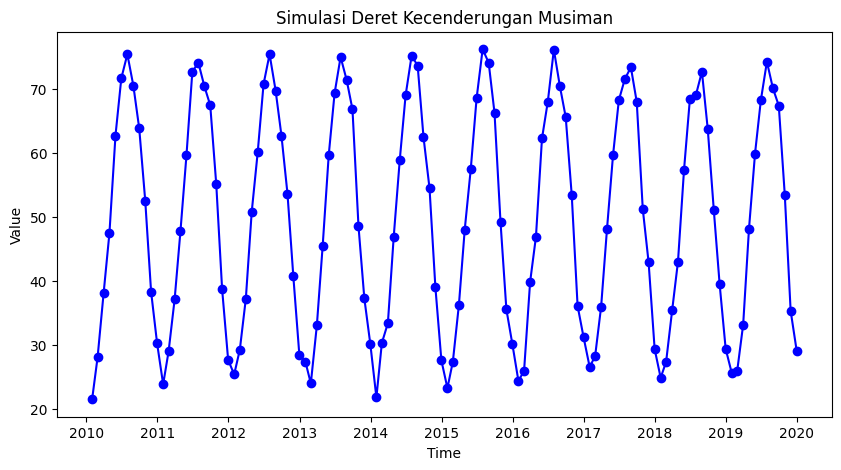

In [105]:
# Plot data deret waktu
plt.figure(figsize=(10, 5))
plt.plot(df_seasonal["Date"], df_seasonal["Value"],'-ob')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulasi Deret Kecenderungan Musiman")
plt.show()


Misalkan deret tersebut merupakan deret musiman dengan periode musiman 12.

In [106]:
# membuat dummy variabel musiman dalam data
from statsmodels.tsa.deterministic import Seasonality
musim= Seasonality(12, initial_period=1).in_sample(df_seasonal.index)
musim.columns=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

In [107]:
musim

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
# pengepasan model regresi tanpa intercept
musiman=sm.OLS(df_seasonal["Value"],musim).fit()

In [109]:
print(musiman.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.7
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          2.94e-100
Time:                        16:53:34   Log-Likelihood:                -244.46
No. Observations:                 120   AIC:                             512.9
Df Residuals:                     108   BIC:                             546.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Januari       24.4468      0.619     39.524      0.0

**Bagaimana interpretasi dari hasil tersebut?**

Hasil regresi menunjukkan bahwa model memiliki R-squared sebesar 0.989, yang berarti 98.9% variasi dalam data dapat dijelaskan oleh model, menunjukkan kecocokan yang sangat baik. Semua variabel (bulan Januari–Desember) memiliki p-value = 0.000, menunjukkan bahwa koefisiennya signifikan secara statistik. Nilai t yang tinggi juga mendukung signifikansi ini.

Durbin-Watson = 1.982 menunjukkan tidak ada masalah autokorelasi. Uji normalitas residual, seperti Omnibus (p = 0.571) dan Jarque-Bera (p = 0.543), menunjukkan bahwa residual berdistribusi normal. Skewness (-0.023) dan kurtosis (2.719) mendekati distribusi normal.

Secara keseluruhan, model ini sangat baik, signifikan secara statistik, dengan residual yang memenuhi asumsi regresi klasik.

In [110]:
# Analisis Sisaan
# mendapatkan sisaan terbakukan
influence=musiman.get_influence()
std_resid=influence.resid_studentized_internal

mapping={1:'$J$',2:'$F$',3:'$M$',
 4:'$A$',5:'$M$',6:'$J$',
 7:'$J$',8:'$A$',9:'$S$',
 10:'$O$',11:'$N$',12:'$D$'}

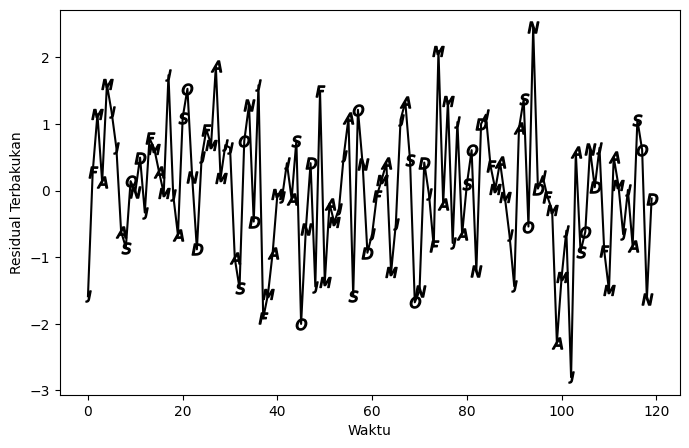

In [111]:
#memetakan sisaan dengan bentuk plot sesuai simbol bulan/musim
plt.figure(figsize=(8,5))
for i in range(len(std_resid)):
 plt.plot(i, std_resid[i], marker=mapping[i%12+1],
 color='black', markersize=8)

#membuat plot sisaan terbakukan
plt.plot(std_resid, color='black')
plt.xlabel('Waktu'), plt.ylabel('Residual Terbakukan')
plt.show()


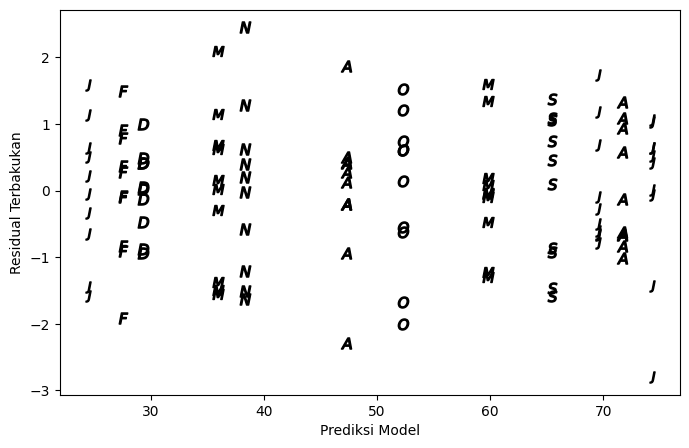

In [112]:
# membuat plot fittedvalues dengan residual terbakukan dengan simbol bulan
plt.figure(figsize=(8,5))
for i in range(len(std_resid)):
  plt.plot(musiman.fittedvalues.values[i],
           std_resid[i], marker=mapping[i%12+1],
           color='black', markersize=8)
plt.xlabel('Prediksi Model'),plt.ylabel('Residual Terbakukan')
plt.show()

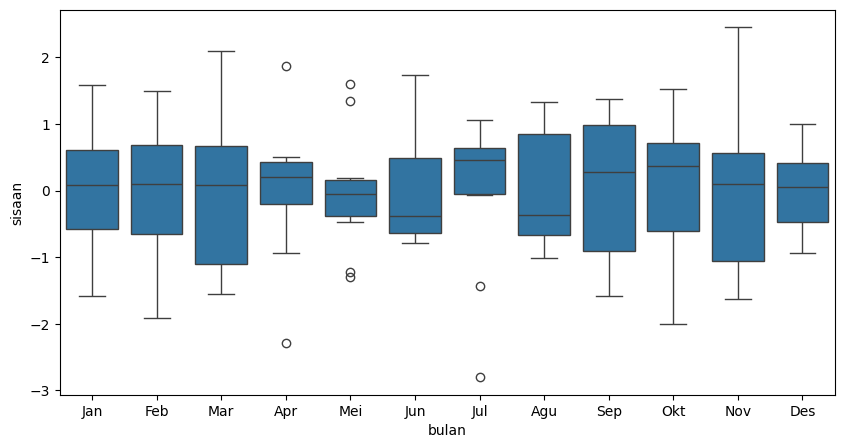

In [113]:
#membuat list daftar bulan
bulan=['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']*10

#membuat dataframe untuk mengidentifikasi sisaan dan periode bulannya
box_sisaan=pd.DataFrame(zip(bulan[:-1], std_resid),
columns=['bulan','sisaan'])

#membuat boxplot per buln
plt.figure(figsize=(10,5))
sns.boxplot(x='bulan',y='sisaan',data=box_sisaan)
plt.show()

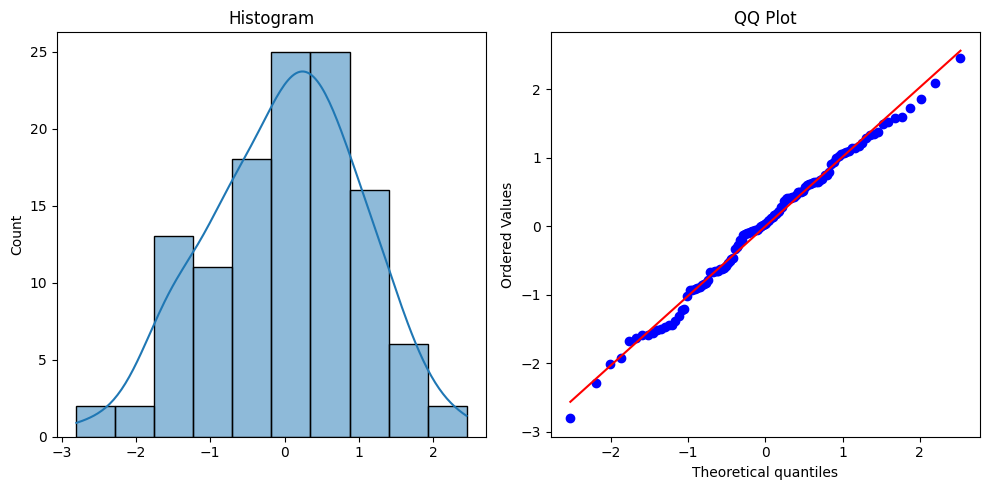

In [114]:
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(std_resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(std_resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

**Berdasarkan plot-plot tersebut apakah dapat dikatakan bahwa model yang dipaskan sudah tepat?**

Berdasarkan hasil uji asumsi, normalitas residual terpenuhi yang ditunjukkan melalui histogram dan QQ plot. Dengan demikian, asumsi model dapat dianggap valid. Selanjutnya, hitunglah statistik uji untuk memverifikasi asumsi model tersebut.


Hitunglah statistik uji untuk mengecek asumsi model

In [115]:
# hitung statistik uji untuk mengecek asumsi model tanpa intersep

In [116]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant to your original regression model
musiman = sm.OLS(df_seasonal["Value"], sm.add_constant(musim)).fit()

# Now, perform the Breusch-Pagan test
bp_test = het_breuschpagan(musiman.resid, musiman.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")

P-value Breusch-Pagan Test: 0.8576


Hasil uji asumsi heteroskedastisitas menunjukan bahwa residual sudah homogen karena nilai p-value lebih besar dari 0,05.

In [117]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(musiman.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)

Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.000335   0.985407
2    0.027709   0.986241
3    0.619979   0.891844
4    1.837971   0.765528
5    1.859383   0.868240
6    1.918941   0.927001
7    1.919793   0.964146
8    4.081463   0.849700
9    6.135454   0.726289
10   6.135638   0.803742
11   6.732172   0.820340
12   7.863541   0.795701
13  11.921705   0.534074
14  11.928980   0.612006
15  13.774308   0.542710
16  13.853806   0.609604
17  14.119281   0.658641
18  15.251353   0.644642
19  15.950092   0.660605


semua p-value lebih besar dari 0,05 (berkisar darii 0.53 hingga 0,986) tidak ada satu pun lag yang menunjukkan autokorelasi signifikan, tidak ada pola acak yang mencurigakan bahkan di lag tinggi.

In [118]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(musiman.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.992296012216462, p-value = 0.7487496520228905


Hasil uji Shapiro-Wilk menunjukkan p-value = 0.7487, yang jauh lebih besar dari 0.05. Ini berarti kita tidak menemukan bukti bahwa data residual menyimpang dari distribusi normal. Dengan kata lain, residual berdistribusi normal. Nilai statistik uji sebesar 0.9923 juga mendukung kesimpulan ini. Jadi, asumsi normalitas dalam model sudah terpenuhi

In [119]:
# pengepasan model regresi dengan intersep
musiman_int=sm.OLS(df_seasonal["Value"],sm.add_constant(musim.iloc[:,1:])).fit()

In [120]:
print(musiman_int.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.7
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          2.94e-100
Time:                        16:54:08   Log-Likelihood:                -244.46
No. Observations:                 120   AIC:                             512.9
Df Residuals:                     108   BIC:                             546.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4468      0.619     39.524      0.0

Perhatikan hasil pengepasan model dengan intersep. Bandingkan hasilnya dengan pengepasan tanpa intersep. **Bagaimana interpretasi model dengan intersep?**

Hasil model dengan dan tanpa intersep menunjukkan adanya perubahan, terutama pada standard error yang cenderung lebih besar untuk beberapa bulan. Selain itu, pada model tanpa intersep, salah satu bulan secara otomatis berperan sebagai intersep. Misalnya, jika bulan Januari dijadikan sebagai acuan, maka nilai untuk bulan tersebut akan diwakili oleh intersep, sedangkan bulan lainnya diukur berdasarkan perbedaannya terhadap Januari.

**Apakah model dengan intersep sudah memenuhi asumsi regresi?**

In [121]:
# uji asumsi model dengan intersep

In [122]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant to your original regression model
musiman = sm.OLS(df_seasonal["Value"], sm.add_constant(musim)).fit()

# Now, perform the Breusch-Pagan test
bp_test = het_breuschpagan(musiman_int.resid, musiman_int.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")

P-value Breusch-Pagan Test: 0.7990


Hasil uji Breusch-Pagan menunjukkan p-value = 0.7990, yang jauh lebih besar dari 0.05. Ini berarti kita tidak memiliki cukup bukti untuk menolak hipotesis nol, yang menyatakan bahwa variansi residual bersifat homogen (tidak terjadi heteroskedastisitas). Dengan kata lain, asumsi kesamaan ragam (homoskedastisitas) dalam model terpenuhi.

In [123]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(musiman_int.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)

Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.000335   0.985407
2    0.027709   0.986241
3    0.619979   0.891844
4    1.837971   0.765528
5    1.859383   0.868240
6    1.918941   0.927001
7    1.919793   0.964146
8    4.081463   0.849700
9    6.135454   0.726289
10   6.135638   0.803742
11   6.732172   0.820340
12   7.863541   0.795701
13  11.921705   0.534074
14  11.928980   0.612006
15  13.774308   0.542710
16  13.853806   0.609604
17  14.119281   0.658641
18  15.251353   0.644642
19  15.950092   0.660605


semua p-value lebih besar dari 0,05 (berkisar darii 0.53 hingga 0,986) tidak ada satu pun lag yang menunjukkan autokorelasi signifikan, tidak ada pola acak yang mencurigakan bahkan di lag tinggi.

In [124]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(musiman_int.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.9922960122164619, p-value = 0.7487496520228828


Dan asumsi normalitas dengan menggunakan uji shapiro wilk menunjukan nilai p-value diatas nilai alfa 5 % (0,05) sehingga residual sudah berdistribusi normal. Dari keseluruhan asumsi untuk model dengan intersep terlihat bahwa model sudah memnuhi asumsi heteroskedastisitas, autokorelasi dan normalitas sehingga model layak digunakan.

## Kecenderungan Linear dan Musiman

In [125]:
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Komponen trend linear
a, b = 0.5, 10 #(intersep dan slope)
trend = a * x + b

# Komponen musiman (sinusoidal)
seasonality = 5 * np.sin(2 * np.pi * x / 12)

# Noise acak
noise = np.random.normal(scale=2, size=n)

# Gabungan semua komponen
series = trend + seasonality + noise


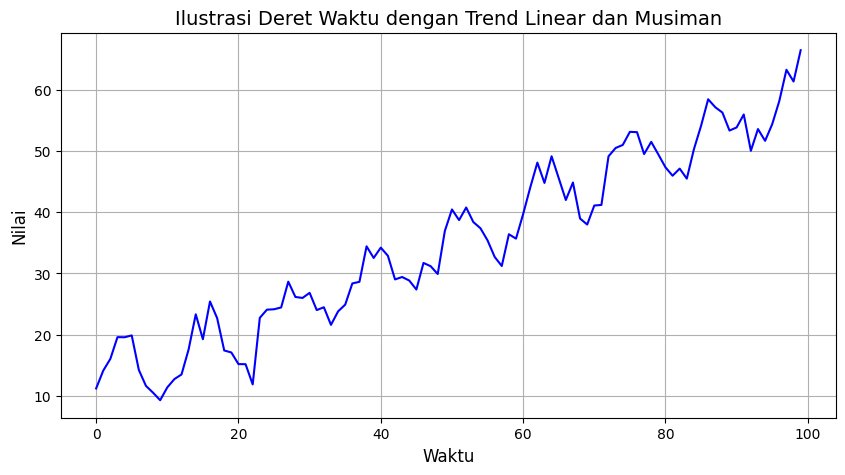

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, series, color='b')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu dengan Trend Linear dan Musiman', fontsize=14)
plt.grid()
plt.show()

Untuk deret tersebut, dibutuhkan model yang mampu menangkap kecenderungan linear (tren) sekaligus kecenderungan musiman dalam deret. Salah satu model sederhana yang dapat digunakan adalah model regresi linear dengan variabel musiman.

In [126]:
# mengubah data menjadi format dataframe
df_mix = pd.DataFrame(series, columns=['Value'])

# mengekstrak komponen musiman dalam data
from statsmodels.tsa.deterministic import Seasonality
season= Seasonality(12, initial_period=1).in_sample(df_mix.index)
season.columns=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

In [127]:
season['period']=x

model_mix=sm.OLS(series,season).fit()

In [128]:
print(model_mix.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     472.3
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.07e-73
Time:                        16:58:14   Log-Likelihood:                -200.88
No. Observations:                 100   AIC:                             427.8
Df Residuals:                      87   BIC:                             461.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Januari       10.1295      0.721     14.055      0.0

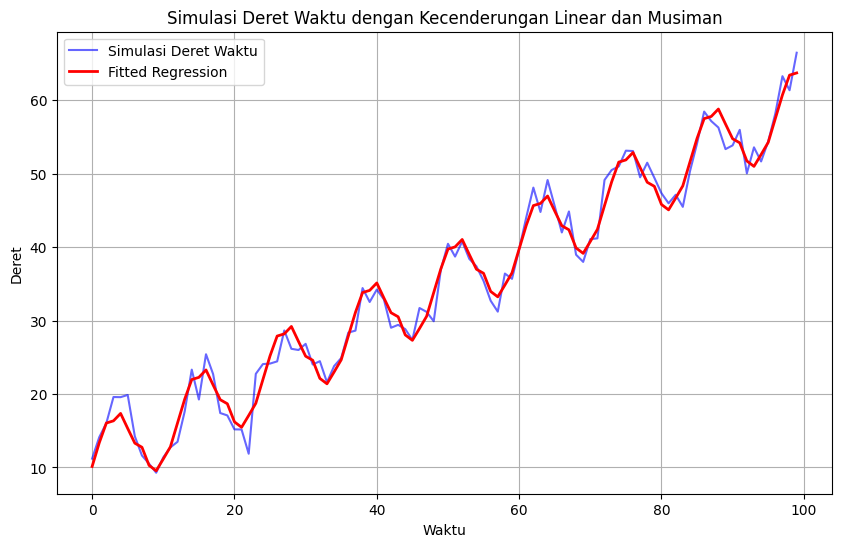

In [129]:
# Prediksi menggunakan model yang sudah dilatih
pred_mix = model_mix.predict(season)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(x, series, label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(x, pred_mix, label='Fitted Regression', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Linear dan Musiman')
plt.xlabel('Waktu')
plt.ylabel('Deret')
plt.legend()
plt.grid(True)
plt.show()

Lakukan pengecekan asumsi model!

In [ ]:
# uji asumsi model

In [130]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Assuming 'season' is your original independent variable data
X_with_const = sm.add_constant(season)  # Add a constant column

# Re-fit your model, if needed, with the constant
model_mix = sm.OLS(series, X_with_const).fit()

# Now, perform the Breusch-Pagan test
bp_test = het_breuschpagan(model_mix.resid, model_mix.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")

P-value Breusch-Pagan Test: 0.9118


Uji Asumsi Heteroskedastisitas terpenuhi.

In [131]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(model_mix.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)


Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.026922   0.869670
2    0.097054   0.952632
3    1.084593   0.780795
4    1.351835   0.852522
5    2.542951   0.770013
6    5.752746   0.451450
7    5.824206   0.560420
8    6.027048   0.644202
9    6.030118   0.736900
10  11.036617   0.354672
11  11.427225   0.408196
12  12.180722   0.431277
13  12.326888   0.501038
14  12.455387   0.569782
15  12.861790   0.612972
16  14.709618   0.546000
17  15.337385   0.571194
18  15.833991   0.604132
19  16.191853   0.644441


Dengan uji asumsi autokorelasi juga dengan ljung box dapat disimpulkan bahwa residual data sudah tidak memiliki korelasi antar pengamatan.

In [132]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(model_mix.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.9953826572559219, p-value = 0.9837948375123595


Dari hasil uji asumsi normalitas juga terpenuhi sehingga model mix memenuhi asumsi heteroskedastisitas, autokorelasi, dan normalitas dan model layak digunakan.



Saat melihat plot dari suatu deret, terkadang kita tidak yakin komponen apa saja yang ada dalam deret. Misalkan, apakah deret tidak memuat tren? apakah ada tren? apakah ada komponen musiman? Untuk memastikan komponen apa saja yang ada dalam suatu deret, dapat dilakukan dengan dekomposisi deret. Dekomposisi deret bertujuan menguraikan deret menjadi 3 komponen, yaitu tren, musiman, dan noise.

In [133]:
# Melakukan dekomposisi untuk deret simulasi kecenderungan linear
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Value'], model='additive', period=12)

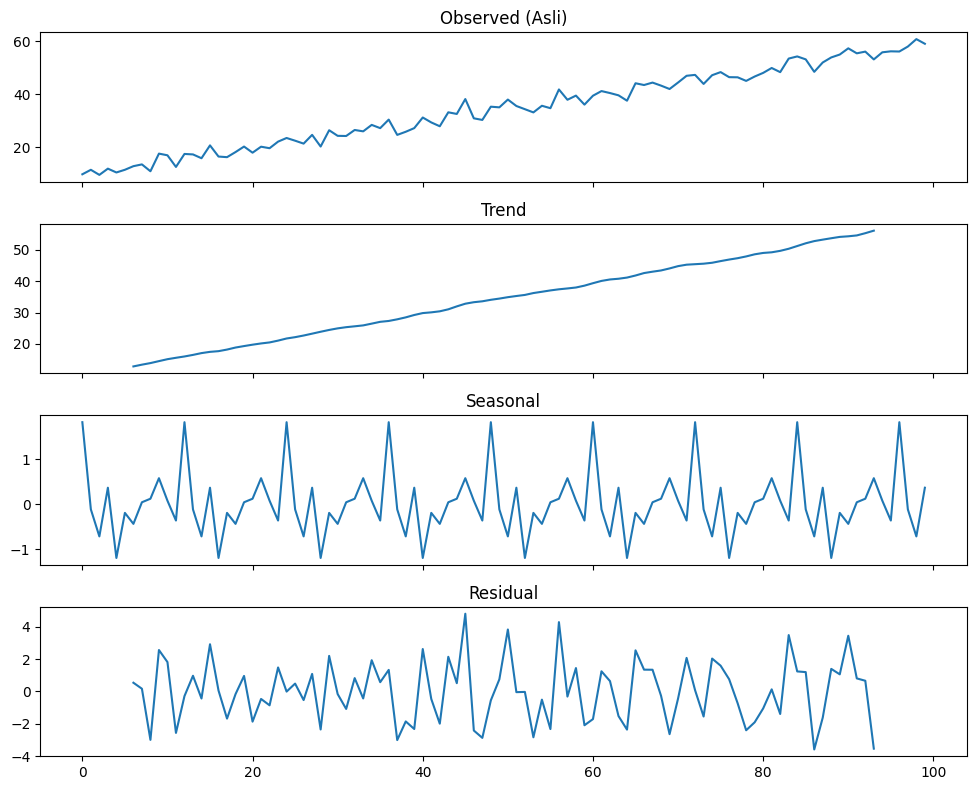

In [134]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=axes[0], title='Observed (Asli)')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

**Bagaimana interpretasi hasil dekomposisi deret tersebut?**

dari hasil dekomposisi ini menunjukan bahwa data memiliki pola seasonal.

In [135]:
# Melakukan dekomposisi untuk deret simulasi kecenderungan linear dan musiman
from statsmodels.tsa.seasonal import seasonal_decompose
result_mix = seasonal_decompose(df_mix['Value'], model='additive', period=12)

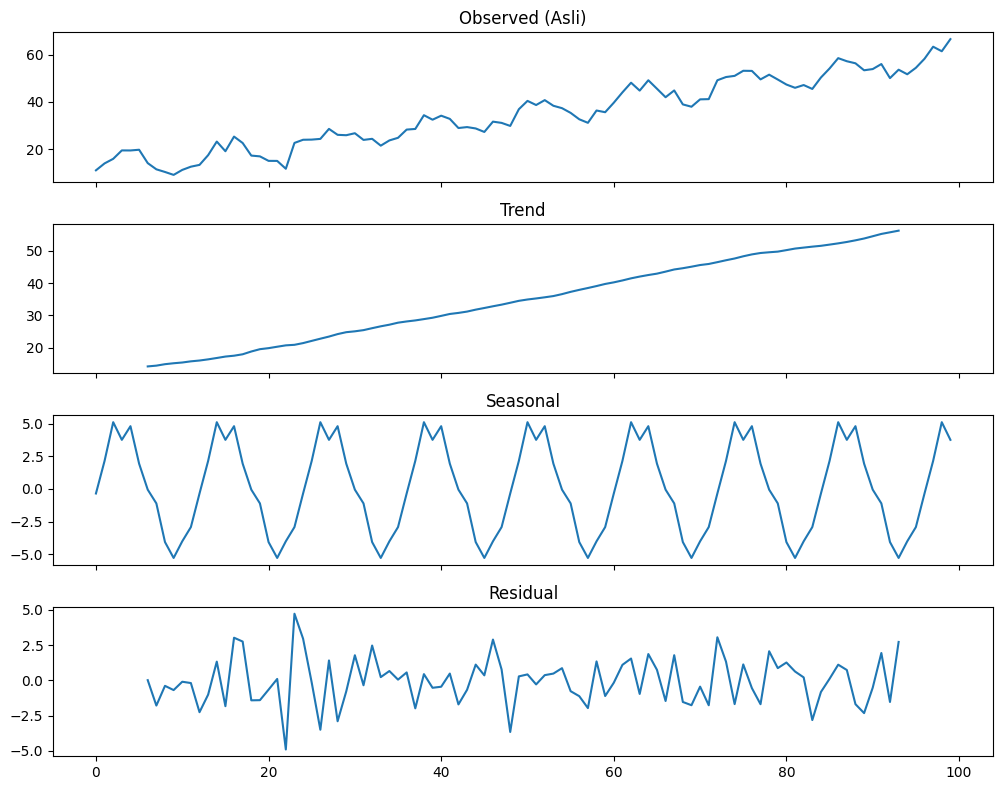

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result_mix.observed.plot(ax=axes[0], title='Observed (Asli)')
result_mix.trend.plot(ax=axes[1], title='Trend')
result_mix.seasonal.plot(ax=axes[2], title='Seasonal')
result_mix.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()


**Bagaimana interpretasi hasil dekomposisi deret tersebut?**

Dari hasil dekomposisi ini menunjukan bahwa dari data memiliki kecenderungan memiliki pola seasonal.

Ketika melakukan dekoposisi deret, perlu diperhatikan bahwa terdapat 2 jenis model untuk dekomposisi, yaitu model `Aditif` dan `multiplikatif`.

- Model `aditif` digunakan jika ragam deret relatif konstan atau kecil

- Model `multiplikatif` digunakan jika ragam deret besar

In [ ]:
# ilustrasi untuk deret multiplikatif
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Komponen trend linear
a, b = 0.05, 10 #(intersep dan slope)
trend = a * x + b

# Komponen musiman (sinusoidal)
seasonality = 1+ 0.5 * np.sin(2 * np.pi * x / 12)

# Noise acak
noise = np.random.normal(scale=0.2, size=n)

# Gabungan semua komponen
series_multi = trend*seasonality + noise

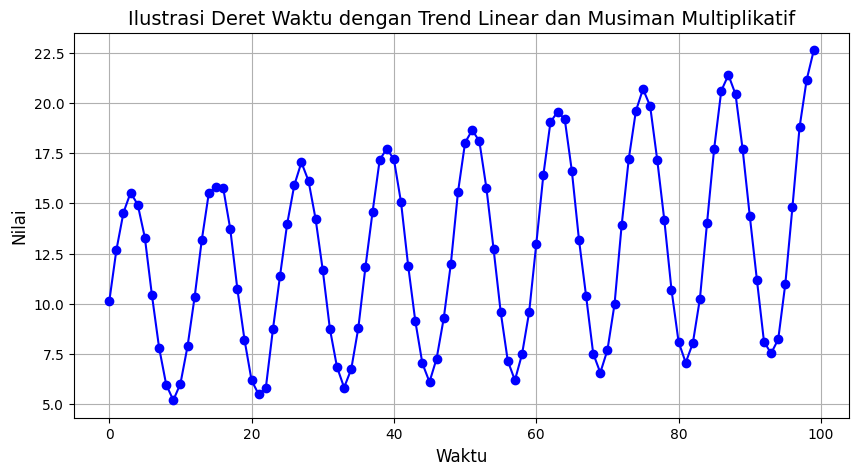

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, series_multi, color='b', marker='o')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu dengan Trend Linear dan Musiman Multiplikatif', fontsize=14)
plt.grid()
plt.show()

Dekomposisi dengan model multiplikatif hanya bisa dilakukan untuk deret dengan nilai >0, sehingga jika deret memiliki nilai 0 atau negatif maka deret perlu ditransformasi.

In [ ]:
#  Dekomposisi dengan model multiplikatif
# mengubah data menjadi format dataframe
df_multi = pd.DataFrame(series_multi, columns=['Value'])

from statsmodels.tsa.seasonal import seasonal_decompose
result_multi = seasonal_decompose(df_multi['Value'], model='multiplicative', period=12)

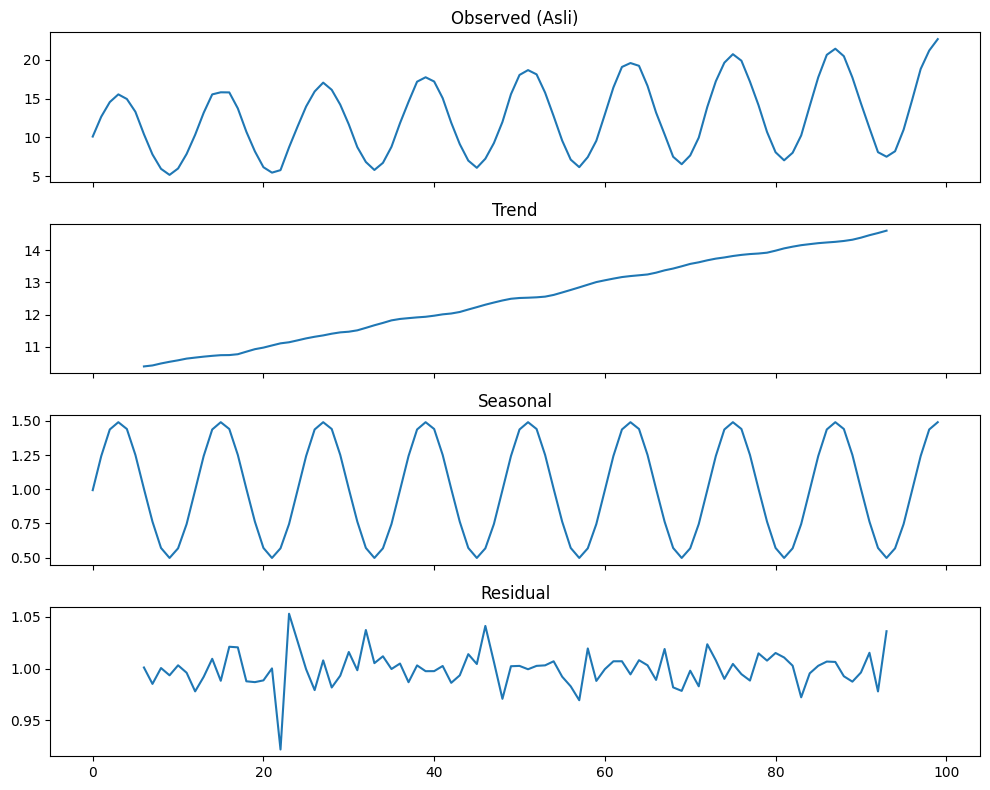

In [ ]:
# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_multi.observed.plot(ax=axes[0], title='Observed (Asli)')
result_multi.trend.plot(ax=axes[1], title='Trend')
result_multi.seasonal.plot(ax=axes[2], title='Seasonal')
result_multi.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

In [ ]:
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Hanya noise acak tanpa trend atau musiman
noise = np.random.normal(loc=10, scale=2, size=n)  # Nilai acak sekitar 10

# Buat DataFrame untuk regresi
df = pd.DataFrame({'Time': x, 'Series': noise})
df['Time'] = pd.to_datetime(df['Time'], unit='D')  # Konversi ke format waktu
df.set_index('Time', inplace=True)

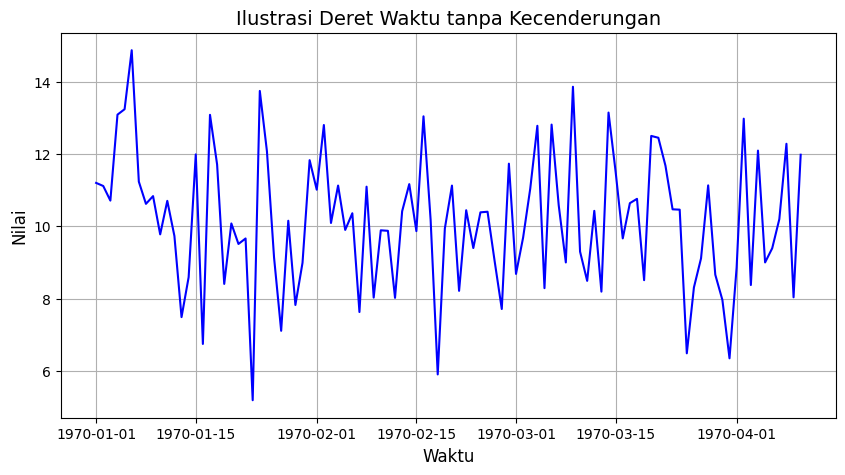

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Series'], color='b')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu tanpa Kecenderungan', fontsize=14)
plt.grid()
plt.show()

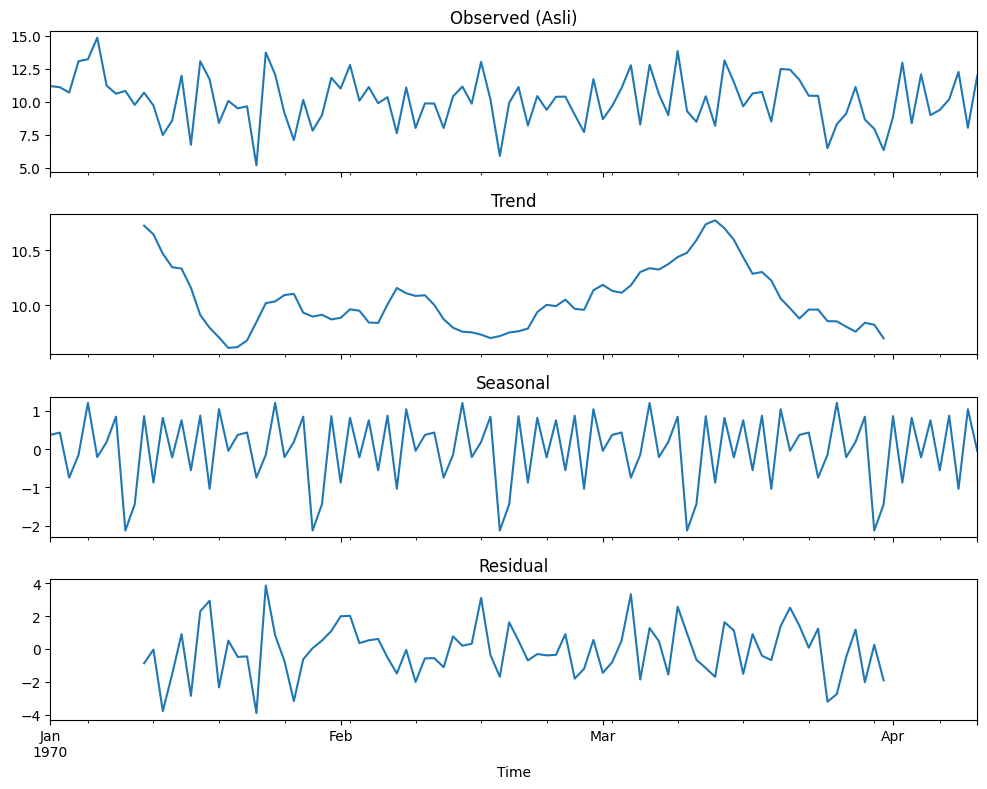

In [ ]:
# Lakukan dekomposisi dengan model aditif
result = seasonal_decompose(df['Series'], model='additive', period=20)

# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], title='Observed (Asli)')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()